## Live Demo: Dice Roll

Roll a pair of 6-sided dice and compute their sum.

Steps:    
1) Write 3 user-defined functions    
2) Initialize Sim object    
3) Define input distributions    
4) Run the sim    
5) Analyze the results    

<img src="val_var_case_architecture.png" style="float:left" width="450"/>


In [1]:
# Imports
import monaco as mc
from scipy.stats import randint

In [2]:
# 3 User Functions

# Run function
def run(die1, die2):
    dicesum = die1 + die2
    return (dicesum, )

# Preprocess function
def preprocess(case):
    die1 = case.invals['die1'].val
    die2 = case.invals['die2'].val
    return (die1, die2)

# Postprocess function
def postprocess(case, dicesum):
    case.addOutVal(name='Sum', val=dicesum)
    
# User functions dict
fcns = {'run'        : run,
        'preprocess' : preprocess,
        'postprocess': postprocess}

In [3]:
# Initialize sim object
sim = mc.Sim(name='Dice Roll', ndraws=256, fcns=fcns, seed=12345, singlethreaded=True)

In [4]:
# Add input variables
sim.addInVar(name='die1', dist=randint, distkwargs={'low': 1, 'high': 7})
sim.addInVar(name='die2', dist=randint, distkwargs={'low': 1, 'high': 7})

In [5]:
# Run the sim
sim.runSim()

Running 'Dice Roll' Monte Carlo simulation with 256/256 cases...
Drawing random samples for 2 input variables via the 'sobol_random' method... Done
Generating cases... Done


Postprocessing cases: 100%|████████████████████████████████████████████████████| 256/256 [00:00<00:00, 57293.73 cases/s]

Simulation complete! Runtime: 0:00:00.043598


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Sum', ylabel='Probability Density'>)

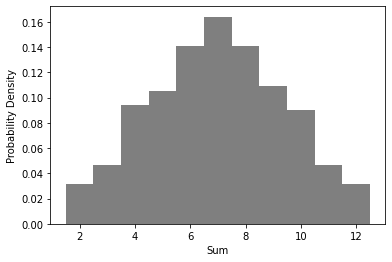

In [6]:
# Plot results
mc.plot(sim.vars['Sum'], plotkwargs={'bins': 10})

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Sum', ylabel='Probability Density'>)

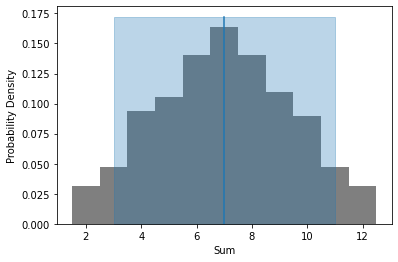

In [7]:
# Add variable statistics and plot again
sim.vars['Sum'].addVarStat('mean')
sim.vars['Sum'].addVarStat('percentile', {'p':[0.05, 0.95]})
mc.plot(sim.vars['Sum'], plotkwargs={'bins': 10})